In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import stats
import shap
import sklearn
import sklearn.neural_network

In [9]:
iris = pd.read_csv('data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [43]:
# to use shap, build our model like we normally would

sv = iris[(iris['class'] == 'Iris-setosa') | (iris['class'] == 'Iris-virginica')]

xs = sv[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
ys = sv['class']

# ys[ ys == 'Iris-setosa' ] = 0 # don't do this anymore :(
ys = ys.replace(['Iris-setosa', 'Iris-virginica'], [0,1]).values

# probably a better idea to split the data etc.
clf = sklearn.neural_network.MLPClassifier(max_iter=10000)
clf.fit(xs,ys)


explainer = shap.Explainer(clf.predict, xs, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # pass in the predict method and the data to use
shap_values = explainer(xs)

In [44]:
# shap_values[i] will give you the data for the ith data point shap values
shap_values[0]

.values =
array([ 0. ,  0. , -0.5,  0. ])

.base_values =
0.5

.data =
array([5.1, 3.5, 1.4, 0.2])

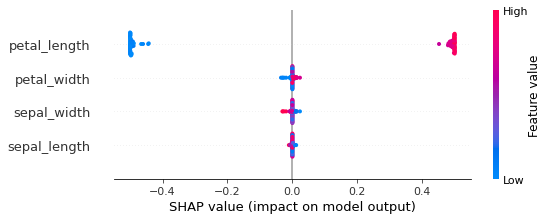

In [45]:
shap.summary_plot(shap_values)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

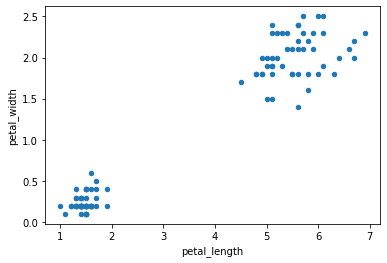

In [48]:
# sv.plot.scatter(x='petal_length', y='petal_width')

<AxesSubplot:>

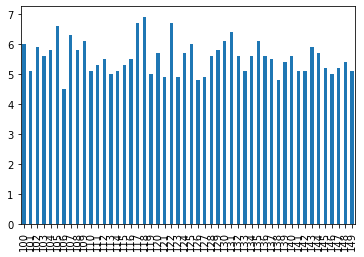

In [52]:
# now maybe visualize bars of petal length colored by class, they should have stark differences
# even more, maybe we do a hyp test of a difference in mean

sv[ys==0]['petal_length'].plot.bar()
sv[ys==1]['petal_length'].plot.bar()